In [1]:
import sys; sys.path.append('..')
import random
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pyzx as zx
import os
import pickle
import numpy as np
import time
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def save_obj(obj, name):
    with open('data/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open('data/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [3]:
load_obj('random/rd_1000_q_8_t_0.4')

{'gatecount': (1000.0, 301.6, 0.0),
 'basic_opt': (574.4, 268.9, 0.05980072021484375),
 'full_reduce': (776.9, 448.8, 0.09613955020904541),
 'clifford_simp': (796.2, 466.1, 0.05966448783874512),
 'sim_annealing_post': (746.5, 417.7, 45.21701788902283),
 'simulated_annealing_simp': (1057.5, 505.6, 48.91020727157593),
 'greedy_simp_neighbors_c1': (764.7, 287.2, 2832.6474674563456),
 'greedy_simp_c1_b_True': (802.0, 321.0, 2.8254130125045775),
 'random_simp_c1_b_True': (798.1, 327.1, 3.573299431800842),
 'greedy_simp_c1_b_False': (776.3, 303.6, 1.0443411588668823),
 'random_simp_c1_b_False': (788.3, 318.4, 1.279131293296814),
 'greedy_simp_neighbors_c-10': (799.0, 269.9, 2775.785569567459),
 'greedy_simp_c-10_b_True': (815.9, 287.3, 2.0046361446380616),
 'random_simp_c-10_b_True': (815.6, 288.3, 2.218462038040161),
 'greedy_simp_c-10_b_False': (808.1, 279.7, 0.7661118030548095),
 'random_simp_c-10_b_False': (815.5, 283.9, 0.8734879970550538)}

In [5]:
load_obj('random_lowbound/rd_1000_q_8_t_0.1')

{'gatecount': (1000.0, 306.6, 0.0),
 'basic_opt': (565.9, 274.4, 0.06145753860473633),
 'full_reduce': (461.2, 304.3, 0.09907920360565185),
 'clifford_simp': (475.6, 317.3, 0.08569831848144531),
 'sim_annealing_post': (452.9, 294.0, 27.851830172538758),
 'simulated_annealing_simp': (930.2, 483.9, 52.557511353492735),
 'greedy_simp_neighbors_c-20': (706.7, 276.9, 17.283021807670593),
 'greedy_simp_c-20_b_True': (721.9, 285.3, 2.345580887794495),
 'random_simp_c-20_b_True': (732.6, 287.0, 2.531921696662903),
 'greedy_simp_c-20_b_False': (714.0, 281.6, 1.048803734779358),
 'random_simp_c-20_b_False': (728.4, 286.5, 1.1658880949020385),
 'greedy_simp_neighbors_c-30': (706.7, 276.9, 18.46942529678345),
 'greedy_simp_c-30_b_True': (721.9, 285.3, 2.325244188308716),
 'random_simp_c-30_b_True': (728.5, 290.0, 2.5738768100738527),
 'greedy_simp_c-30_b_False': (714.0, 281.6, 1.060034203529358),
 'random_simp_c-30_b_False': (730.4, 288.1, 1.168369722366333)}

In [6]:
def merge_costs(depth, qubits, tprob):
    highbound = load_obj('random/rd_'+str(depth)+'_q_'+str(qubits)+'_t_0.'+str(tprob))
    lowbound = load_obj('random_lowbound/rd_'+str(depth)+'_q_'+str(qubits)+'_t_0.'+str(tprob))
    return [
        [highbound['greedy_simp_neighbors_c1'],highbound['greedy_simp_neighbors_c-10'],lowbound['greedy_simp_neighbors_c-20'],lowbound['greedy_simp_neighbors_c-30']],
        [highbound['greedy_simp_c1_b_False'],highbound['greedy_simp_c-10_b_False'],lowbound['greedy_simp_c-20_b_False'],lowbound['greedy_simp_c-30_b_False']],
        [highbound['random_simp_c1_b_False'],highbound['random_simp_c-10_b_False'],lowbound['random_simp_c-20_b_False'],lowbound['random_simp_c-30_b_False']]
    ]

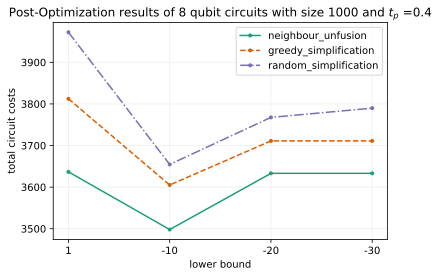

In [7]:
depth = 1000
qubits = 8
tprob = 4
yys = [[cost[0] + 10*cost[1] for cost in approach] for approach in merge_costs(depth,qubits,tprob)]
names = ['neighbour_unfusion','greedy_simplification','random_simplification']
xs = ['1','-10','-20','-30']
colors = ['#1b9e77', '#d95f02', '#7570b3']
styles = ['-','--','-.']
# xs,yys = generate_plot_data('rd_depth_q_4_t_0.', names,mode=1)
fig = plt.figure()
fig.title ='Hellou'
ax1 = fig.add_subplot(111)
for i, ys in enumerate(yys):
    ax1.plot(xs, ys, c=colors[i], marker="o",markersize=3, linestyle=styles[i], label=names[i])

ax1.set_ylabel("total circuit costs")
ax1.set_xlabel("lower bound")
ax1.legend(loc='upper right')
plt.grid(color='#EEEEEE')
plt.title('Post-Optimization results of '+str(qubits)+' qubit circuits with size '+str(depth)+' and $t_p$ =0.'+str(tprob))
plt.show()

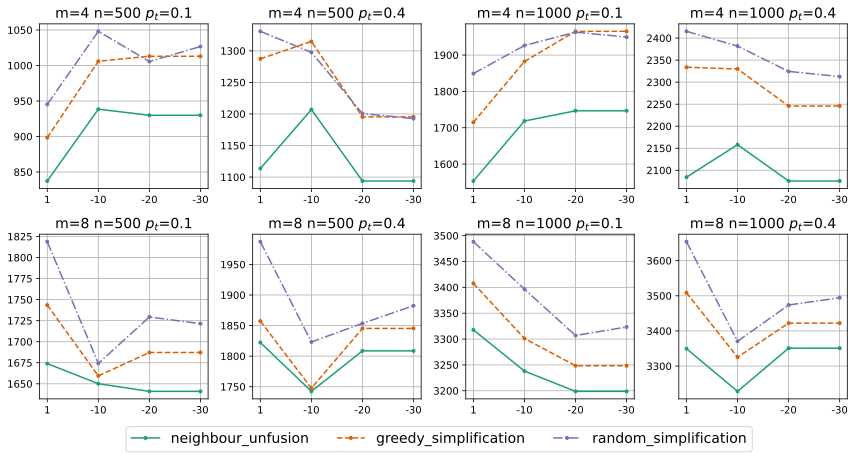

In [8]:
params = [[[500,4,1],[500,4,4],[1000,4,1],[1000,4,4]],[[500,8,1],[500,8,4],[1000,8,1],[1000,8,4]]]
names = ['neighbour_unfusion','greedy_simplification','random_simplification']
xs = ['1','-10','-20','-30']
colors = ['#1b9e77', '#d95f02', '#7570b3']
styles = ['-','--','-.']
fig, axs = plt.subplots(len(params), len(params[0]), figsize=(12,6))

for i in range(0,len(params)):
    for j in range(0,len(params[i])):
        axs[i,j].set_title('m='+str(params[i][j][1])+' n='+str(params[i][j][0])+' $p_t$=0.'+str(params[i][j][2]),fontsize=14)
        yys = [[(cost[0]-cost[1]) + 10*cost[1] for cost in approach] for approach in merge_costs(params[i][j][0],params[i][j][1],params[i][j][2])]
        for k, ys in enumerate(yys):
            axs[i,j].plot(xs, ys, c=colors[k], marker="o",markersize=3, linestyle=styles[k], label=names[k] if i==0 and j == 0 else '')
        axs[i,j].grid()

plt.figlegend(bbox_to_anchor=(.15, 0), loc='upper left',
          ncol=3, borderaxespad=0, fontsize=14)
# plt.suptitle('Post-Optimization results with different lower heuristic bounds',fontsize=12)
plt.tight_layout()

plt.show()

In [7]:
fig.savefig(r'/home/korbinian/Documents/master/stau21/Dokumentation/Latex/Bilder/evaluation/bound_compare.pdf',bbox_inches='tight')